# Introduction

Let's start with a hypothetical problem we want to solve. We are interested in understanding the relationship between the weather and the number of mosquitos occuring in a particular year so that we can plan mosquito control measures accordingly. Since we want to apply these mosquito control measures at a number of different sites we need to understand both the relationship at a particular site and whether or not it is consistent across sites. The data we have to address this problem comes from the local government and are stored in tables in comma-separated values (CSV) files. Each file holds the data for a single location, each row holds the information for a single year at that location, and the columns hold the data on both mosquito numbers and the average temperature and rainfall from the beginning of mosquito breeding season. The first few rows of our first file look like:

~~~
year,temperature,rainfall,mosquitos
2001,87,222,198
2002,72,103,105
2003,77,176,166
~~~

Dowload the [mosquito_data.zip](https://github.com/qjcg/2015-06-22-caltech-python-1/blob/gh-pages/mosquito_data.zip) data archive if you haven't already.

## Objectives

* Conduct variable assignment, looping, and conditionals in Python
* Use an external Python library
* Read tabular data from a file
* Subset and perform analysis on data
* Display simple graphs

## Loading Data

In order to load the data, we need to import a library called Pandas that knows
how to operate on tables of data.

In [5]:
import pandas

We can now use Pandas to read our data file.

In [2]:
pandas.read_csv('A1_mosquito_data.csv')

,year,temperature,rainfall,mosquitos
0,2001,80,157,150
1,2002,85,252,217
2,2003,86,154,153
3,2004,87,159,158
4,2005,74,292,243
5,2006,75,283,237
6,2007,80,214,190
7,2008,85,197,181
8,2009,74,231,200
9,2010,74,207,184


The `read_csv()` function belongs to the `pandas` library. In order to run it we need to tell Python that it is part of `pandas` and we do this using the dot notation, which is used everywhere in Python to refer to parts of larger things.

When we are finished typing and press Shift+Enter, the notebook runs our command and shows us its output. In this case, the output is the data we just loaded.

The first column on the left is the `index` column, a way for `pandas` to label each row, by default it just uses integers.
However in this case we have a better way of indexing the data, we can use the `year` column. We can use the `index_col` keyword argument to `read_csv()` to specify the index column:

In [3]:
pandas.read_csv('A1_mosquito_data.csv', index_col='year')

,temperature,rainfall,mosquitos
year,,,
2001,80,157,150
2002,85,252,217
2003,86,154,153
2004,87,159,158
2005,74,292,243
2006,75,283,237
2007,80,214,190
2008,85,197,181
2009,74,231,200


Our call to `pandas.read_csv()` read data into memory, but didn't save it anywhere. To do that, we need to assign the array to a variable.

In [6]:
data = pandas.read_csv('A1_mosquito_data.csv', index_col='year')

This statement doesn't produce any output because assignment doesn't display anything. If we want to check that our data has been loaded, we can print the variable's value:

In [7]:
print(data)

      temperature  rainfall  mosquitos
year                                  
2001           80       157        150
2002           85       252        217
2003           86       154        153
2004           87       159        158
2005           74       292        243
2006           75       283        237
2007           80       214        190
2008           85       197        181
2009           74       231        200
2010           74       207        184


`print data` tells Python to display the text. Alternatively we could just include `data` as the last value in a code cell:

In [8]:
data

,temperature,rainfall,mosquitos
year,,,
2001,80,157,150
2002,85,252,217
2003,86,154,153
2004,87,159,158
2005,74,292,243
2006,75,283,237
2007,80,214,190
2008,85,197,181
2009,74,231,200


This tells the IPython Notebook to display the `data` object, which is why we see a pretty formated table.

## Manipulating data

Once we have imported the data we can start doing things with it. First, let's ask what type of thing `data` refers to:

In [9]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


The data is stored in a data structure called a DataFrame. There are other kinds of data structures that are also commonly used in scientific computing including Numpy arrays, and Numpy matrices, which can be used for doing linear algebra.

We can select an individual column of data using its name:

In [10]:
print(data['temperature'])

year
2001    80
2002    85
2003    86
2004    87
2005    74
2006    75
2007    80
2008    85
2009    74
2010    74
Name: temperature, dtype: int64


Or we can select several columns of data at once:

In [11]:
print(data[['rainfall', 'temperature']])

      rainfall  temperature
year                       
2001       157           80
2002       252           85
2003       154           86
2004       159           87
2005       292           74
2006       283           75
2007       214           80
2008       197           85
2009       231           74
2010       207           74


In [12]:
data.index

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype='int64')

We can also select subsets of rows using slicing. Say we just want the first two rows of data:

In [13]:
print(data[:2])

      temperature  rainfall  mosquitos
year                                  
2001           80       157        150
2002           85       252        217


There are a couple of important things to note here. First, Python indexing starts at zero. In contrast, programming languages like R and MATLAB start counting at 1, because that's what human beings have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) count from 0 because that's simpler for computers to do. This means that if we have 5 things in Python they are numbered 0, 1, 2, 3, 4, and the first row in a data frame is always row 0.

The other thing to note is that the subset of rows starts at the first value and goes up to, but does not include, the second value. Again, the up-to-but-not-including takes a bit of getting used to, but the rule is that the difference between the upper and lower bounds is the number of values in the slice.

In [14]:
print(data[1:4])

      temperature  rainfall  mosquitos
year                                  
2002           85       252        217
2003           86       154        153
2004           87       159        158


However most of the time we want to index using the `index`!

In [15]:
data.ix[2004:2008]

,temperature,rainfall,mosquitos
year,,,
2004,87,159,158
2005,74,292,243
2006,75,283,237
2007,80,214,190
2008,85,197,181


In [16]:
data.ix[2004:2008]["temperature"]

year
2004    87
2005    74
2006    75
2007    80
2008    85
Name: temperature, dtype: int64

In [17]:
data.ix[2004]

temperature     87
rainfall       159
mosquitos      158
Name: 2004, dtype: int64

We can also subset the data based on the value of other rows:

In [18]:
data['temperature'][data['mosquitos'] > 200]

year
2002    85
2005    74
2006    75
Name: temperature, dtype: int64

### Challenge

Print the mosquitos number when temperature is more than 75 degrees between 2005 and 2008

In [19]:
data['mosquitos'][data['temperature'] > 75].ix[2005:2008]

year
2007    190
2008    181
Name: mosquitos, dtype: int64

In [20]:
data['mosquitos'].ix[2005:2008][data['temperature'] > 75]

year
2007    190
2008    181
Name: mosquitos, dtype: int64

Data frames also know how to perform common mathematical operations on their values. If we want to find the average value for each variable, we can just ask the data frame for its mean values

In [21]:
print(data.mean())

temperature     80.0
rainfall       214.6
mosquitos      191.3
dtype: float64


Data frames have lots of useful methods:

In [22]:
print(data.max())

temperature     87
rainfall       292
mosquitos      243
dtype: int64


In [23]:
print(data['temperature'].min())

74


In [24]:
print(data['mosquitos'][1:3].std())

45.2548339959


### Challenge

Import the data from `A2_mosquito_data.csv`, create a new variable that holds a data frame with only the weather data, and print the means and standard deviations for the weather variables.

## Summary on how to use parentheses

In [25]:
abs(-1) # call function
data.max() # call method on an object

data[:3] # slicing by row
data["temperature"] # get a column of a data frame "slice a column"
dataslice = data.ix[2004:2008] # this is a special case, we are slicing ix

## Plotting

The mathematician Richard Hamming once said, "The purpose of computing is insight, not numbers," and the best way to develop insight is often to visualize data. The main plotting library in Python is `matplotlib`. To get started, let's tell the IPython Notebook that we want our plots displayed inline, rather than in a separate viewing window:

In [2]:
%matplotlib inline

The `%` at the start of the line signals that this is a command for the notebook, rather than a statement in Python. Next, we will import the `pyplot` module from `matplotlib`, but since `pyplot` is a fairly long name to type repeatedly let's give it an alias.

In [3]:
from matplotlib import pyplot as plt

This import statement shows two new things. First, we can import part of a library by using the `from library import submodule` syntax. Second, we can use a different name to refer to the imported library by using `as newname`.

Now, let's make a simple plot showing how the number of mosquitos varies over time. We'll use the site you've been doing exercises with since it has a longer time-series.

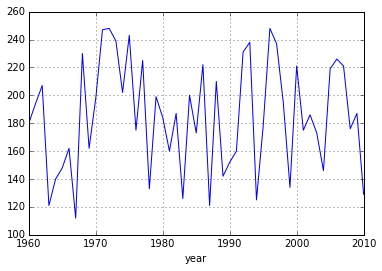

In [6]:
data = pandas.read_csv('A2_mosquito_data.csv', index_col="year")
data['mosquitos'].plot()

More complicated plots can be created by adding a little additional information. Let's say we want to look at how the different weather variables vary over time.

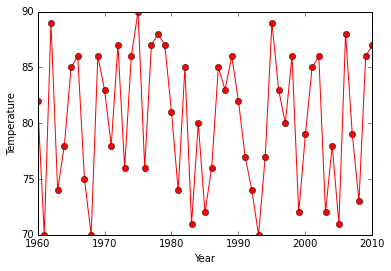

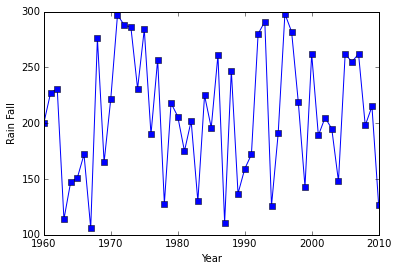

In [7]:
plt.plot(data.index, data['temperature'], 'ro-')
plt.xlabel('Year')
plt.ylabel('Temperature')

plt.figure()
plt.plot(data.index, data['rainfall'], 'bs-')
plt.xlabel('Year')
plt.ylabel('Rain Fall')

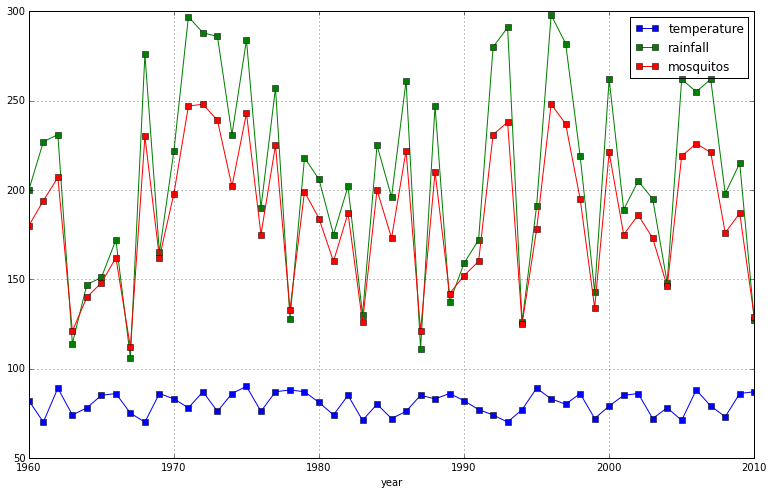

### Challenge

Using the data in `A2_mosquito_data.csv` plot the relationship between the number of mosquitos and temperature and the number of mosquitos and rainfall.

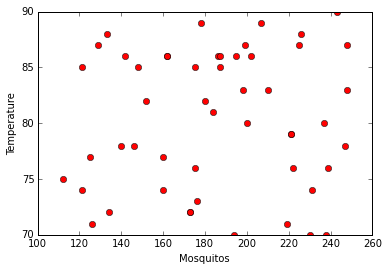

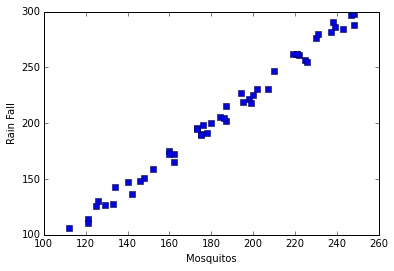

In [10]:
plt.plot(data['mosquitos'], data['temperature'], 'ro')
plt.xlabel('Mosquitos')
plt.ylabel('Temperature')

plt.figure()
plt.plot(data['mosquitos'], data['rainfall'], 'bs')
plt.xlabel('Mossquitos')
plt.ylabel('Rain Fall')

Pandas can automatically plot a complete table:

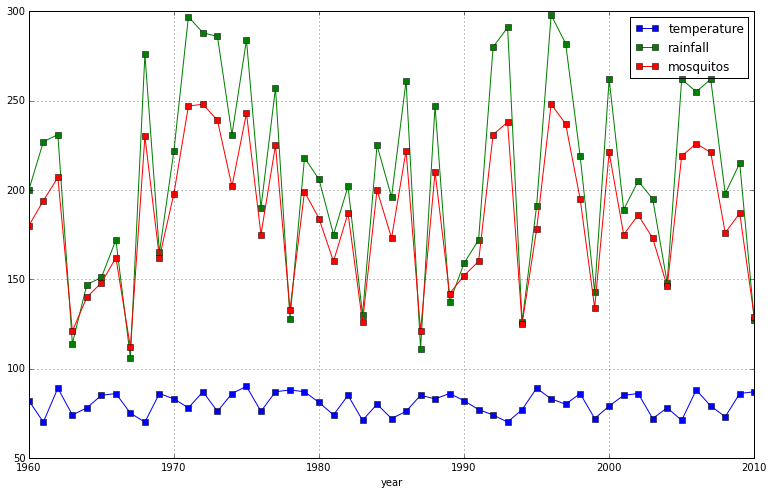

In [9]:
data.plot(figsize=(13,8), marker='s')

### Key Points

*   Import a library into a program using `import libraryname`.
*   Use the `pandas` library to work with data tables in Python.
*   Use `variable = value` to assign a value to a variable.
*   Use `print something` to display the value of `something`.
*   Use `dataframe['columnname']` to select a column of data.
*   Use `dataframe[start_row:stop_row]` to select rows from a data frame.
*   Indices start at 0, not 1.
*   Use `dataframe.mean()`, `dataframe.max()`, and `dataframe.min()` to calculate simple statistics.
*   Use `for x in list:` to loop over values
*   Use `if condition:` to make conditional decisions
*   Use the `pyplot` library from `matplotlib` for creating simple visualizations.

## Next steps

With the requisite Python background out of the way, now we're ready to dig in to analyzing our data, and along the way learn how to write better code, more efficiently, that is more likely to be correct.